### MNIST Handwrittten digit recognition

In [44]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from tqdm.notebook import tqdm

In [45]:
from torchvision import datasets, transforms

mnist_train=datasets.MNIST(root="./datasets", train=True, transform=transforms.ToTensor(), download=True)
mnist_test=datasets.MNIST(root="./datasets", train=False, transform=transforms.ToTensor(), download=True)

In [46]:
print("The training MNIST examples: {}".format(len(mnist_train)))
print("The testing MNIST examples: {}".format(len(mnist_test)))

The training MNIST examples: 60000
The testing MNIST examples: 10000


The default size of image: torch.Size([1, 28, 28])
The reshaped image size: torch.Size([28, 28])
The label of this image: 1


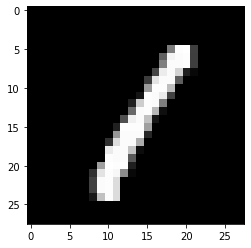

In [47]:
#Looking at a data example
image, label=mnist_train[3]

print("The default size of image: {}".format(image.shape))
image=image.reshape([28,28])

print("The reshaped image size: {}".format(image.shape))
plt.imshow(image, cmap="gray")

print("The label of this image: {}".format(label))

In [48]:
train_loader=torch.utils.data.DataLoader(mnist_train, batch_size=100, shuffle=True)
test_loader=torch.utils.data.DataLoader(mnist_test, batch_size=100, shuffle=False)

In [49]:
data_train_iter=iter(train_loader)
images, labels=data_train_iter.next()

print("Shape of minibatch: {}".format(images.shape))
print("Shape of labels: {}".format(labels.shape))

Shape of minibatch: torch.Size([100, 1, 28, 28])
Shape of labels: torch.Size([100])


### Logistic Regression Model

In [50]:
x=images.view(-1,28*28)

print("The shape of image: {}".format(x.shape))

The shape of image: torch.Size([100, 784])


In [51]:
#Randomly initializing weigthts (Xavier Initialization)
W=torch.randn(784,10)/np.sqrt(784)
W.requires_grad_()

#Initializing bias b
b=torch.zeros(10, requires_grad=True)

In [52]:
#Finding y by linear transformation W and b
y=torch.matmul(x,W)+b

In [53]:
#Option 1: Softmax to probabilities from equation
py_eq=torch.exp(y)/torch.sum(torch.exp(y),dim=1, keepdim=True)

print("py[0] from the equation: {}".format(py_eq[0]))

#Option2: Softmax to probabilities with torch.nn.functional
import torch.nn.functional as F
py=F.softmax(y, dim=1)

print("py[0] using torch.nn.functional.softmax : {}".format(py[0]))


py[0] from the equation: tensor([0.0957, 0.0608, 0.1111, 0.1005, 0.0856, 0.1549, 0.1257, 0.0982, 0.1129,
        0.0546], grad_fn=<SelectBackward>)
py[0] using torch.nn.functional.softmax : tensor([0.0957, 0.0608, 0.1111, 0.1005, 0.0856, 0.1549, 0.1257, 0.0982, 0.1129,
        0.0546], grad_fn=<SelectBackward>)


In [54]:
#OPtion 1: Cross entropy from equation
cross_entropy_eq=torch.mean(-torch.log(py)[range(labels.shape[0]),labels])

print("The cross entropy from equations is: {}".format(cross_entropy_eq))

#Option 2: Cross entropy using torch.nn.functional
cross_entropy=F.cross_entropy(y,labels)
print("The cross entropy using torch.nn.functional: {}".format(cross_entropy))

The cross entropy from equations is: 2.3184986114501953
The cross entropy using torch.nn.functional: 2.318498134613037


In [55]:
#Optimizing the parameters
optimizer=torch.optim.SGD([W, b], lr=0.1)


In [56]:
#Calculating gradient for W and b
cross_entropy.backward()

In [57]:
#Each of variable which required gradients now have accumulated gradient
b.grad

tensor([-0.0002, -0.0303,  0.0404,  0.0420, -0.0169, -0.0362, -0.0061,  0.0225,
         0.0031, -0.0184])

In [58]:
optimizer.step()

In [59]:
b

tensor([ 2.1729e-05,  3.0259e-03, -4.0433e-03, -4.2024e-03,  1.6949e-03,
         3.6160e-03,  6.0568e-04, -2.2469e-03, -3.1067e-04,  1.8393e-03],
       requires_grad=True)

In [60]:
print("b.grad before zero_grad(): {}".format(b.grad))
optimizer.zero_grad()

print("b.grad after zero_grad(): {}".format(b.grad))

b.grad before zero_grad(): tensor([-0.0002, -0.0303,  0.0404,  0.0420, -0.0169, -0.0362, -0.0061,  0.0225,
         0.0031, -0.0184])
b.grad after zero_grad(): tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])


## Training Model
#### 1. Load minibatch
#### 2. Zero the parameters W and b
#### 3. Forward pass(predict label, calculate loss)
#### 4. Backward pass(compute gradients, perform SGD)

In [61]:
for images, labels in tqdm(train_loader):
    #Zero the previous gradient
    optimizer.zero_grad()
    
    #Forward Pass
    x=images.view(-1,28*28)
    y=torch.matmul(x, W)+b
    cross_entropy=F.cross_entropy(y,labels)
    
    #Backward pass
    cross_entropy.backward()
    optimizer.step()


### Testing the model

In [62]:
correct=0;
total=len(mnist_test)

with torch.no_grad():
    #Iterating through test set minibatches
    for images, labels in tqdm(test_loader):
        #Forward Pass
        x=images.view(-1,28*28)
        y=torch.matmul(x,W)+b
        
        predictions=torch.argmax(y,dim=1)
        correct +=torch.sum((predictions==labels).float())
        
print("Test accuracy: {}".format(correct/total))


Test accuracy: 0.9035000205039978


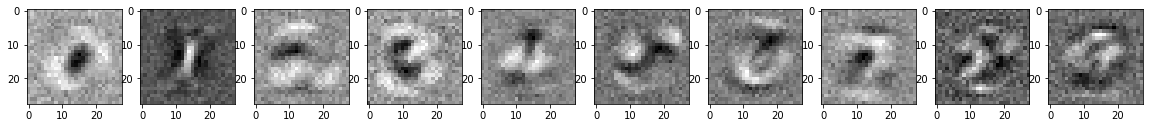

In [65]:
#Get weights
fig, ax =plt.subplots(1,10, figsize=(20,2))

for digit in range(10):
    ax[digit].imshow(W[:,digit].detach().view(28,28), cmap="gray")

In [66]:
import numpy as np
import torch
import torch.nn.functional as F
from torchvision import datasets, transforms
from tqdm.notebook import tqdm

# Load the data
mnist_train = datasets.MNIST(root="./datasets", train=True, transform=transforms.ToTensor(), download=True)
mnist_test = datasets.MNIST(root="./datasets", train=False, transform=transforms.ToTensor(), download=True)
train_loader = torch.utils.data.DataLoader(mnist_train, batch_size=100, shuffle=True)
test_loader = torch.utils.data.DataLoader(mnist_test, batch_size=100, shuffle=False)

## Training
# Initialize parameters
W = torch.randn(784, 10)/np.sqrt(784)
W.requires_grad_()
b = torch.zeros(10, requires_grad=True)

# Optimizer
optimizer = torch.optim.SGD([W,b], lr=0.1)

# Iterate through train set minibatchs 
for images, labels in tqdm(train_loader):
    # Zero out the gradients
    optimizer.zero_grad()
    
    # Forward pass
    x = images.view(-1, 28*28)
    y = torch.matmul(x, W) + b
    cross_entropy = F.cross_entropy(y, labels)
    # Backward pass
    cross_entropy.backward()
    optimizer.step()

## Testing
correct = 0
total = len(mnist_test)

with torch.no_grad():
    # Iterate through test set minibatchs 
    for images, labels in tqdm(test_loader):
        # Forward pass
        x = images.view(-1, 28*28)
        y = torch.matmul(x, W) + b
        
        predictions = torch.argmax(y, dim=1)
        correct += torch.sum((predictions == labels).float())
    
print('Test accuracy: {}'.format(correct/total))


Test accuracy: 0.902999997138977
